In [55]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import csv

vec_path = '../CADD modeling/vectors.csv'
csv_vector = pd.read_csv(vec_path)
vector_dim = (2506, 1024)

In [56]:
vec_1 = np.random.random(vector_dim)
vec_2 = np.random.random(vector_dim)
vec_3 = csv_vector['Label'].values[:2506]

cos_sim = np.array([round(float(cosine_similarity([vec_1[index]], [vec_2[index]])[0][0]), 3) for index in range(vector_dim[0])])
# cos_sim.shape

con = np.c_[cos_sim, vec_3]
con.shape

(2506, 2)

In [61]:
pos_arr = []
neg_arr = []

for index in range(len(con)):
    if con[index][1] == 0:
        neg_arr.append(con[index][0])
    else:
        pos_arr.append(con[index][0])

<Axes: ylabel='Density'>

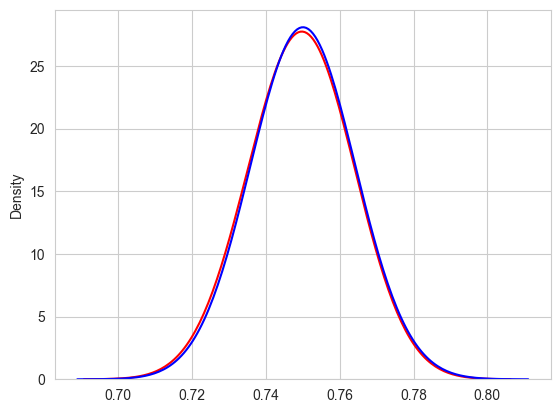

In [66]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(pos_arr), bw_method=1, color='red')
sns.kdeplot(np.array(neg_arr), bw_method=1, color='blue')

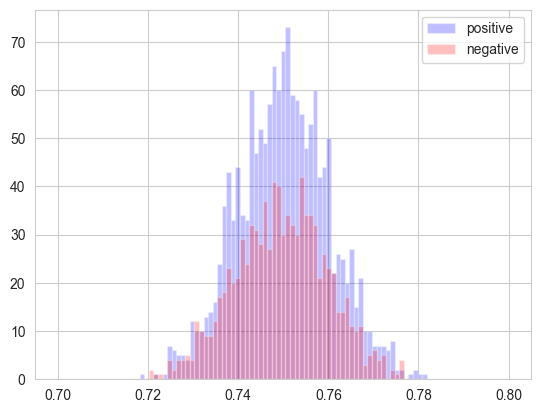

In [89]:
import matplotlib.pyplot as plt
import random

bins = np.linspace(0.7, 0.8, 100)

plt.hist(neg_arr, bins, alpha=0.25, label='positive', color='blue')
plt.hist(pos_arr, bins, alpha=0.25, label='negative', color='red')
plt.legend(loc='upper right')
plt.show()